In [1]:
#install lib
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('Dataset/phishing_site_urls.csv')

In [4]:
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [5]:
df.shape

(549346, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [7]:
df.isnull().sum()

URL      0
Label    0
dtype: int64

In [8]:
df.Label.value_counts()

Label
good    392924
bad     156422
Name: count, dtype: int64

In [9]:
from nltk.tokenize import RegexpTokenizer


In [10]:
tokenizer=RegexpTokenizer(r'[A-Za-z]+')

In [11]:
df.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [12]:
tokenizer.tokenize(df.URL[0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [13]:
df.URL.map(lambda t:tokenizer.tokenize(t))

0         [nobell, it, ffb, d, dca, cce, f, login, SkyPe...
1         [www, dghjdgf, com, paypal, co, uk, cycgi, bin...
2         [serviciosbys, com, paypal, cgi, bin, get, int...
3         [mail, printakid, com, www, online, americanex...
4         [thewhiskeydregs, com, wp, content, themes, wi...
                                ...                        
549341                                                   []
549342                                [apple, checker, org]
549343                                 [apple, iclods, org]
549344                                [apple, uptoday, org]
549345                                [apple, search, info]
Name: URL, Length: 549346, dtype: object

In [14]:
df['text_tokenized']=df.URL.map(lambda t:tokenizer.tokenize(t))

In [15]:
df.head()

,URL,Label,text_tokenized
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi..."


In [16]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")


In [17]:
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
df['text_final'] = df['text_stemmed'].map(lambda l: " ".join(l))

In [18]:
df.head()

,URL,Label,text_tokenized,text_stemmed,text_final
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [19]:
good_sites=df[df.Label=='good']

In [20]:
bad_sites=df[df.Label=='bad']

In [21]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

def plot_wordcloud(text, 
                   mask=None, 
                   max_words=400, 
                   max_font_size=128, 
                   figure_size=(24.0, 16.0),
                   title=None, 
                   title_size=48, 
                   image_color=False):
    
    # Default stopwords
    stopwords = set(STOPWORDS)
    
    # Add more stopwords
    more_stopwords = ['com', 'http']
    stopwords = stopwords.union(more_stopwords)

    # Create the wordcloud
    wordcloud = WordCloud(
        background_color="white",
        stopwords=stopwords,
        max_words=max_words,
        max_font_size=max_font_size,
        random_state=42,
        mask=mask
    )

    wordcloud.generate(text)

    # Plot settings
    plt.figure(figsize=figure_size)

    if image_color and mask is not None:
        image_colors = ImageColorGenerator(mask)
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
        plt.title(title, fontdict={'size': title_size, 'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.title(title, fontdict={'size': title_size, 'color': 'green',
                                   'verticalalignment': 'bottom'})

    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [22]:
good_sites = df[df.Label == 'good']
all_text = ' '.join(good_sites['text_final'])


In [23]:
bad_sites = df[df.Label == 'bad']
all_bad_text = ' '.join(bad_sites['text_final'])


In [24]:
! pip install wordcloud



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
from wordcloud import WordCloud


In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [27]:
good_sites = df[df.Label == 'good']
bad_sites  = df[df.Label == 'bad']


In [28]:
good_text = " ".join(good_sites['text_final'])
bad_text  = " ".join(bad_sites['text_final'])


In [29]:
wc_good = WordCloud(width=1200, height=600, background_color='white').generate(good_text)
wc_bad  = WordCloud(width=1200, height=600, background_color='black').generate(bad_text)


In [30]:
df.head()

,URL,Label,text_tokenized,text_stemmed,text_final
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


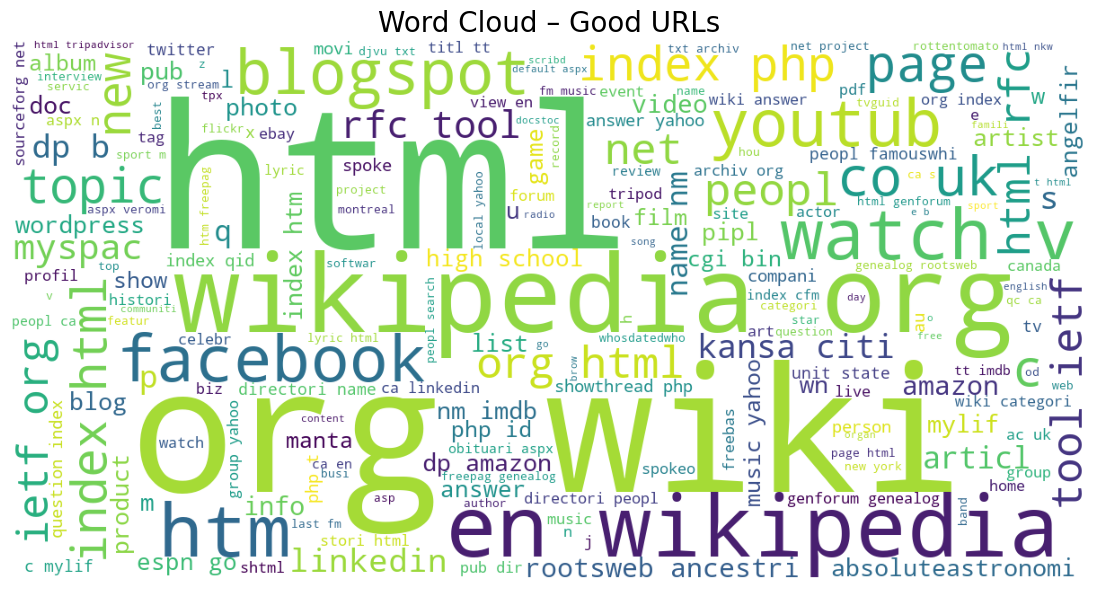

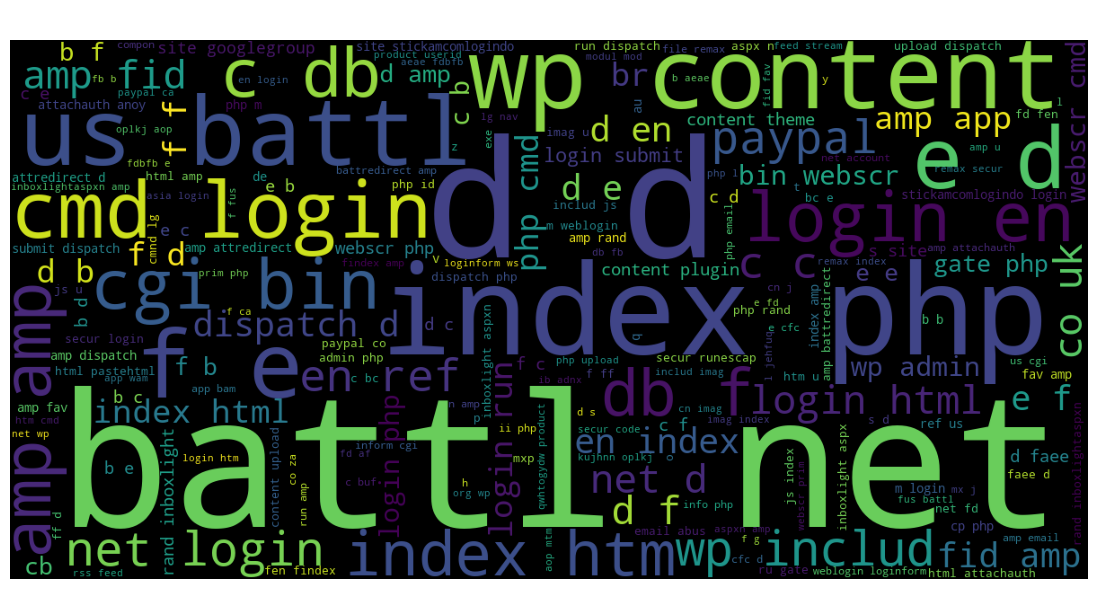

In [31]:
plt.figure(figsize=(14, 7))
plt.imshow(wc_good)
plt.title("Word Cloud – Good URLs", fontsize=20)
plt.axis('off')
plt.show()

plt.figure(figsize=(14, 7))
plt.imshow(wc_bad)
plt.title("Word Cloud – Phishing URLs", fontsize=20, color='white')
plt.axis('off')
plt.show()


# Model Training

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [33]:
vectorizer = TfidfVectorizer(max_features=5000)   # you can adjust features


In [34]:
X = vectorizer.fit_transform(df['text_final'])


In [35]:
X.shape


(549346, 5000)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

print("Accuracy:", model.score(X_test, y_test))


Accuracy: 0.9386092654955857


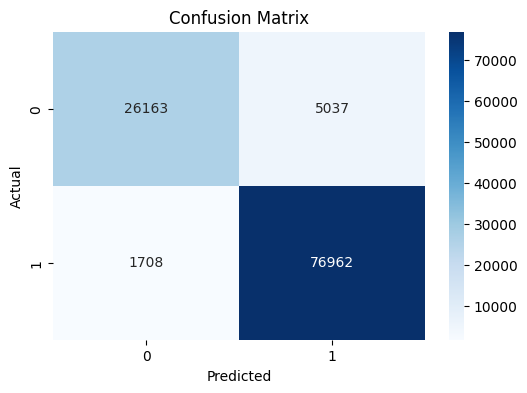

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         bad       0.94      0.84      0.89     31200
        good       0.94      0.98      0.96     78670

    accuracy                           0.94    109870
   macro avg       0.94      0.91      0.92    109870
weighted avg       0.94      0.94      0.94    109870



In [39]:
new_text = "secure-paypal-login.com/update"
new_text = " ".join(RegexpTokenizer(r'\w+').tokenize(new_text.lower()))
new_text = " ".join([stemmer.stem(w) for w in new_text.split()])

vect = vectorizer.transform([new_text])
prediction = model.predict(vect)

print("Prediction:", prediction[0])


Prediction: bad


In [40]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [41]:
mnb.fit(X_train,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [42]:
mnb.score(X_test,y_test)

0.929835259852553

# Save model

In [43]:
import pickle


In [44]:
pickle.dump(model, open('phishing.pkl', 'wb'))


In [45]:
pickle.dump(mnb, open('phishing_mnb.pkl', 'wb'))

In [46]:

from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(stop_words='english', max_features=5000)
tf.fit(df['text_final'])  # or X_raw


,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,analyzer,'word'
,stop_words,'english'
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"


In [47]:
import pickle
pickle.dump(tf, open('vectorizer.pkl', 'wb'))


In [48]:
predict_bad=['informationconcernant.x11s.org/verifier/etap1.html?u=xwww.visaeurope.fr/espace-client/mes-donnees-personnelles?rpsnv=','www.oasisbucaramanga.org/portal/templates/beez/css/e5/confirmando.html','www.fcbrokers.com.au/paypai/update/your-account/paypai-login/service/Path=Ishcw32r4t86NZntgyR5359/'
]
predict_good=['https://www.youtube.com/watch?v=jghcSqQXYT8&t=757s','https://www.youtube.com/watch?v=t5OKlU0icRs','https://www.kaggle.com/datasets/taruntiwarihp/phishing-site-urls']

In [49]:
predict_good = tf.transform(predict_good)


In [50]:
predict_bad = tf.transform(predict_bad)


In [51]:
model.predict(predict_good)

array(['good', 'good', 'good'], dtype=object)

In [52]:
model.predict(predict_bad)

array(['bad', 'bad', 'bad'], dtype=object)

In [53]:
mnb.predict(predict_good)

array(['good', 'good', 'bad'], dtype='<U4')

In [54]:
mnb.predict(predict_bad)

array(['bad', 'bad', 'bad'], dtype='<U4')

In [55]:
predict_bad=["www.cielofidelidadepromocao2011.xpg.com.br/cad-id=0985.php","c-b42770d5.016-121-6c756c10.cust.bredbandsbolaget.se/.../ppl_red2/redirect.htm","www.ardengrange.es/wp-content/uploads/2012/03/jan.php"]

In [56]:
predict_bad = tf.transform(predict_bad)

In [57]:
model.predict(predict_bad)


array(['good', 'good', 'good'], dtype=object)

In [58]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier


In [60]:
df = pd.read_csv('Dataset/phishing_site_urls.csv')


In [61]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [62]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])


In [63]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['URL'])
y = df['Label']


In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [65]:
model_xgb = XGBClassifier(
    n_estimators=200,
    max_depth=7,
    learning_rate=0.1,
    n_jobs=-1,
    eval_metric='logloss'
)

model_xgb.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [66]:
y_pred = model_xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9005005916082643

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.71      0.80     31200
           1       0.90      0.97      0.93     78670

    accuracy                           0.90    109870
   macro avg       0.91      0.84      0.87    109870
weighted avg       0.90      0.90      0.90    109870



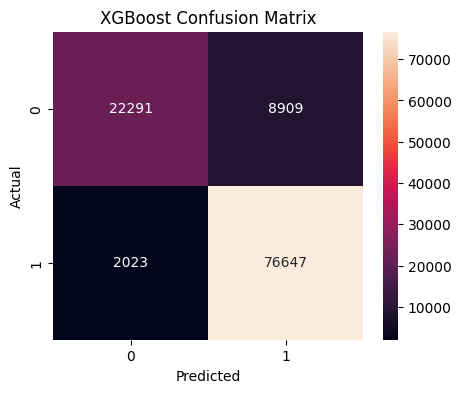

In [67]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.show()


In [68]:
import pandas as pd
import numpy as np
import re

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier


In [69]:
df = pd.read_csv("Dataset/phishing_site_urls.csv")


In [70]:
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])


In [ ]:
def extract_features(url):
    return pd.Series({
        "url_length": len(url),
        "num_dots": url.count('.'),
        "num_slashes": url.count('/'),
        "num_digits": len(re.findall(r"\d", url)),
        "num_hyphens": url.count('-'),
        "num_special": len(re.findall(r"[@%&=?:]", url)),
        "has_https": 1 if "https" in url else 0,
        "has_ip": 1 if re.search(r'\d+\.\d+\.\d+\.\d+', url) else 0,
        "count_www": url.count("www"),
        "ends_with_php": 1 if url.endswith(".php") else 0
    })

features = df["URL"].apply(extract_features)


In [ ]:
vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = vectorizer.fit_transform(df['URL'])


In [ ]:
from scipy.sparse import hstack

X = hstack([X_tfidf, features.values])   # hybrid input
y = df["Label"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
model = XGBClassifier(
    n_estimators=400,
    max_depth=9,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    n_jobs=-1,
    eval_metric='logloss'
)

model.fit(X_train, y_train)


In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Hybrid XGBoost Confusion Matrix")
plt.show()


In [ ]:
import pickle
pickle.dump(tf, open('xgbooster.pkl', 'wb'))

In [1]:
import pandas as pd
import numpy as np
import re

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier


In [2]:
df = pd.read_csv("Dataset/phishing_site_urls.csv")
print(df.head())
print(df.info())


                                                 URL Label
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...   bad
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...   bad
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....   bad
3  mail.printakid.com/www.online.americanexpress....   bad
4  thewhiskeydregs.com/wp-content/themes/widescre...   bad
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB
None


In [3]:
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])


In [4]:
def extract_advanced_features(url):
    return pd.Series({
        "url_length": len(url),
        "num_dots": url.count('.'),
        "num_slashes": url.count('/'),
        "num_digits": len(re.findall(r'\d', url)),
        "num_hyphens": url.count('-'),
        "num_underscores": url.count('_'),
        "num_special": len(re.findall(r'[@%&=?:]', url)),
        "has_https": 1 if "https" in url else 0,
        "has_ip": 1 if re.search(r'\d+\.\d+\.\d+\.\d+', url) else 0,
        "count_www": url.count("www"),
        "ends_with_php": 1 if url.endswith(".php") else 0,
        "uppercase_ratio": sum(1 for c in url if c.isupper()) / len(url)
    })

features = df['URL'].apply(extract_advanced_features)


In [5]:
vectorizer = TfidfVectorizer(max_features=10000, analyzer='char', ngram_range=(3,5))
X_tfidf = vectorizer.fit_transform(df['URL'])
y = df['Label']


In [6]:
from scipy.sparse import hstack

X = hstack([X_tfidf, features.values])


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [9]:
vectorizer = TfidfVectorizer(max_features=3000, analyzer='char', ngram_range=(3,5))


In [10]:
model = XGBClassifier(
    n_estimators=200,      # reduce from 600
    max_depth=9,           # reduce from 12
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    min_child_weight=3,
    n_jobs=-1,
    eval_metric='logloss',
    tree_method='hist'     # keeps it fast
)


In [11]:
import re

def extract_advanced_features(url):
    return pd.Series({
        "url_length": len(url),
        "num_dots": url.count('.'),
        "num_slashes": url.count('/'),
        "num_digits": len(re.findall(r'\d', url)),
        "num_hyphens": url.count('-'),
        "num_underscores": url.count('_'),
        "num_special": len(re.findall(r'[@%&=?:]', url)),
        "has_https": 1 if "https" in url else 0,
        "has_ip": 1 if re.search(r'\d+\.\d+\.\d+\.\d+', url) else 0,
        "count_www": url.count("www"),
        "ends_with_php": 1 if url.endswith(".php") else 0,
        "uppercase_ratio": sum(1 for c in url if c.isupper()) / len(url)
    })

features = df['URL'].apply(extract_advanced_features)


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000, analyzer='char', ngram_range=(3,5))
X_tfidf = vectorizer.fit_transform(df['URL'])
y = df['Label']


In [13]:
from scipy.sparse import hstack, csr_matrix

features_sparse = csr_matrix(features.values)
X = hstack([X_tfidf, features_sparse])


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [15]:

from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=200,      # reduced for memory
    max_depth=9,           # reduced for memory
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    min_child_weight=3,
    n_jobs=-1,
    eval_metric='logloss',
    tree_method='hist'     # fast + memory efficient
)

model.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [16]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.945945207973059

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.85      0.90     31285
           1       0.94      0.98      0.96     78585

    accuracy                           0.95    109870
   macro avg       0.95      0.92      0.93    109870
weighted avg       0.95      0.95      0.95    109870



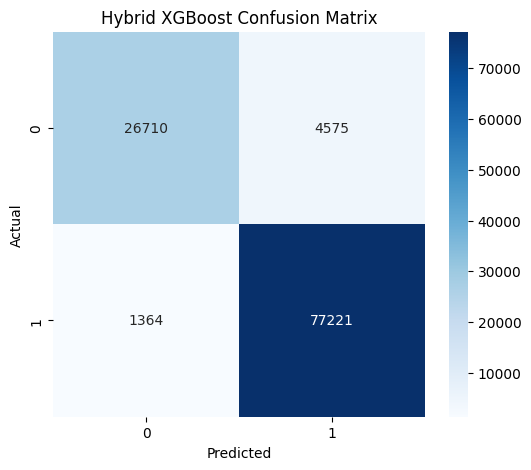

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Hybrid XGBoost Confusion Matrix")
plt.show()


In [23]:
import pickle


In [24]:
# Save XGBoost model
with open("xgboost_hybrid_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [25]:
# Save TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)